# Farig sir instructions

In [ ]:
# # Tokenizer

# Test data ta ke fit korabo na ; just text to sequence korbo
# evaluation data pura puri untouched
# train data tokenize korbo fit korbo

# full data ke first e 90- 10 e vag korbo
# 90 data ke 70 - 20 -10 e vag korbo
# 70 hobe train data
# 20 hobe test data
# 10 hobe validation data


# # code snippet
# from sklearn.model_selection import train_test_split

# # Split into evaluation and remaining data (90%)
# df_eval, df_remaining = train_test_split(train_data, test_size=0.9, random_state=42)

# # Split remaining data into train, validation, and test sets
# df_train, df_temp = train_test_split(df_remaining, test_size=0.3, random_state=42)
# df_test, df_val = train_test_split(df_temp, test_size=0.33, random_state=42)
# # df_eval: 10% for evaluation
# # df_train: 70% of the remaining 90% for training
# # df_val: 10% of the remaining 90% for validation
# # df_test: 20% of the remaining 90% for testing

# Initiating

In [ ]:
#@title Libraries
import numpy as np # linear algebra
import pandas as pd
#Libraries for visualisation
import seaborn as sns #same as matplotlib
import matplotlib.pyplot as plt

#Libraries for formattting and handling text
import string
import re

#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS


#Library for Splitting Dataset
from sklearn.model_selection import train_test_split


#Libraries for NN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model

#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#@title Taking the data from Drive
# from google.colab import drive
# drive.mount('/content/drive')

# train_data = pd.read_csv("/content/drive/MyDrive/CSE440 project Ishmam Eshita/train.csv")
# df_test = pd.read_csv("/content/drive/MyDrive/CSE440 project Ishmam Eshita/test.csv")

Mounted at /content/drive


In [ ]:
#@title Loading the dataset, offline
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train_data.shape

(7613, 5)

In [ ]:
#@title Dataset Division

# df_eval, df_remaining = train_test_split(train_data, test_size=0.9, random_state=42)

# df_train, df_temp = train_test_split(df_remaining, test_size=0.3, random_state=42)
# df_test, df_val = train_test_split(df_temp, test_size=0.33, random_state=42)

In [ ]:
df_train, df_temp = train_test_split(train_data, test_size=0.3, random_state=42)
df_test, df_val = train_test_split(df_temp, test_size=0.33, random_state=42)

In [ ]:
df_train.shape

(5329, 5)

In [ ]:
df_test.shape

(1530, 5)

In [ ]:
df_val.shape

(754, 5)

In [ ]:
train_percentage= (5329/7613)*100
test_perecentage= (1530/7613)*100
val_percentage= (754/7613)*100
print(f"train_percentage = {train_percentage}")
print(f"test_perecentage = {test_perecentage}")
print(f"val_percentage = {val_percentage}")

total = train_percentage + test_perecentage + val_percentage
print(f"total = {total}")

train_percentage = 69.99868645737554
test_perecentage = 20.097202154209903
val_percentage = 9.904111388414554
total = 100.0


# Dataset Plotting and Others

In [ ]:
df_train.head().style.background_gradient(cmap='coolwarm')

,id,keyword,location,text,target
1186,1707,bridge%20collapse,nan,Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP B1G THANKS TO @bmurph1019 @hail_Youtsey . @termn8r13 #GoBlue #WrestleOn http://t.co/OasKgki6Qj,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR,1
5787,8257,rioting,nan,Still rioting in a couple of hours left until I have to be up for class.,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morning during beach run. Surface wounds on left elbow and right knee. http://t.co/yaqRSximph,0


In [ ]:
df_train.head()

,id,keyword,location,text,target
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0


Text(0.5, 1.0, 'Target Distributions \n (0: Non Disaster || 1: Disaster)')

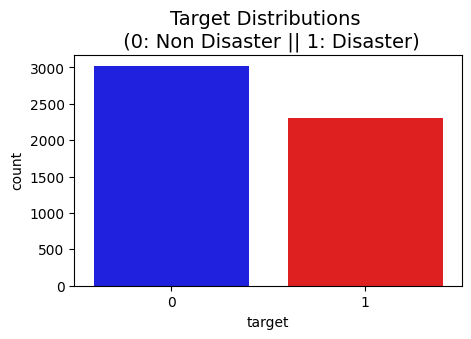

In [ ]:
plt.figure(figsize=(5,3))
colors = ["blue", "red"]

sns.countplot(x = 'target', data=df_train, palette=colors)
plt.title('Target Distributions \n (0: Non Disaster || 1: Disaster)', fontsize=14)

In [ ]:
df_train["keyword"].nunique()

221

Text(0.5, 0, 'Count of Keywords')

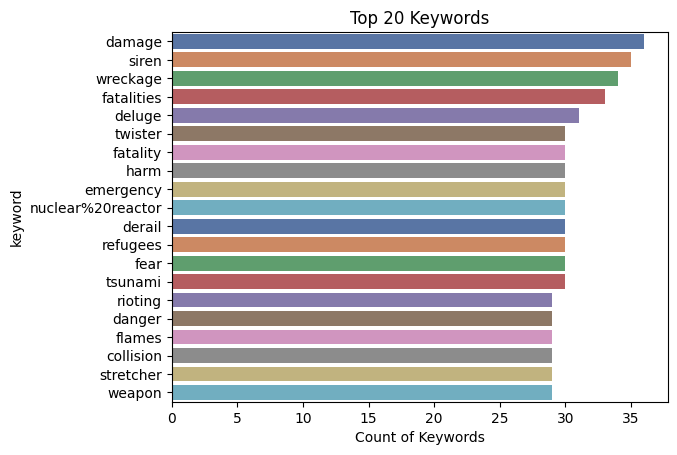

In [ ]:
#@title Top 20 Keyword
chains=df_train['keyword'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Top 20 Keywords")
plt.xlabel("Count of Keywords")

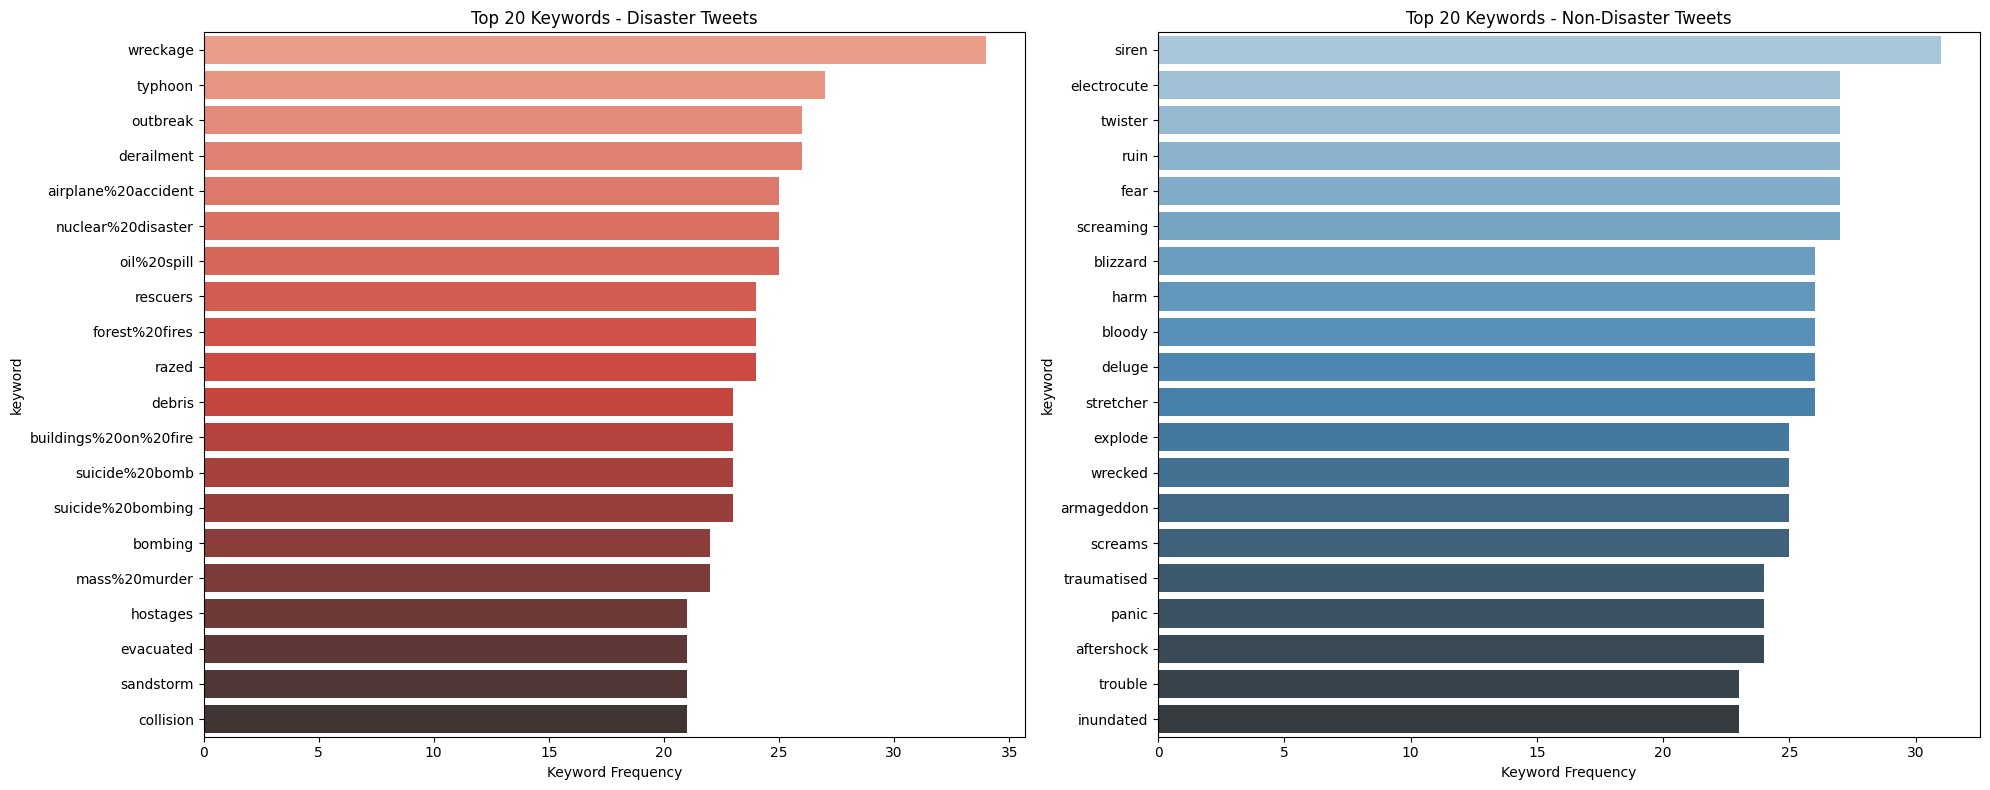

In [ ]:
#@title Disaster Vs Non Disaster 20 Keywords
disaster_keywords = df_train.loc[train_data["target"] == 1]["keyword"].value_counts()
nondisaster_keywords = df_train.loc[train_data["target"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")

sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")


plt.tight_layout()
plt.show()

In [ ]:
#@title Location
locations = df_train["location"].value_counts()

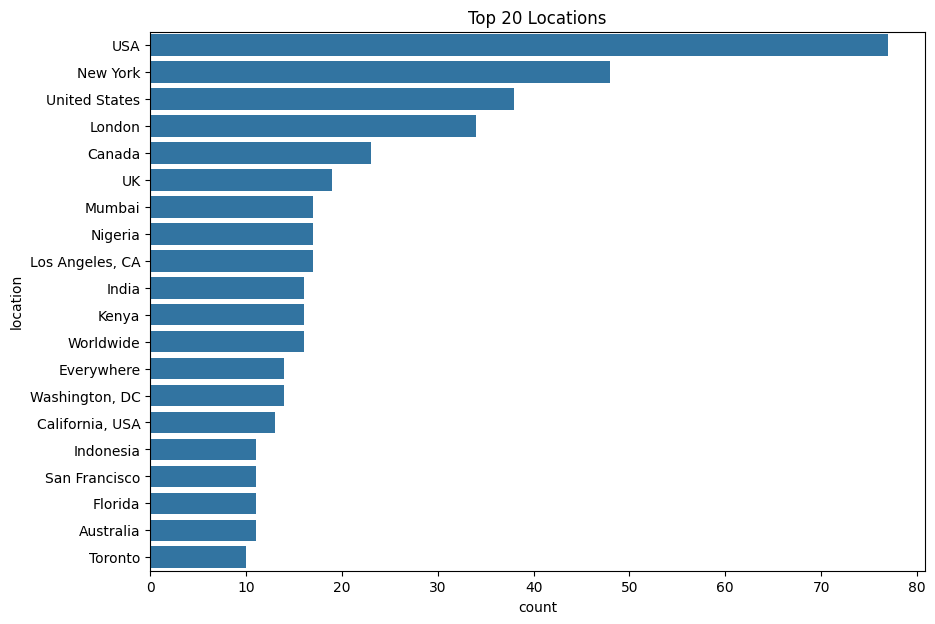

In [ ]:
#@title Top 20 Locations In Tweets
plt.figure(figsize=(10,7))
sns.barplot(y=locations[0:20].index, x=locations[0:20], orient='h')

plt.title("Top 20 Locations")
plt.show()

In [ ]:
#@title text
print(len(df_train['text']))

5329


In [ ]:
df_train["length"]  = df_train["text"].apply(len)
df_train.head()

,id,keyword,location,text,target,length
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,138
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,126
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,85
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1,72
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,134


In [ ]:
# descrive the text
df_train['length'].describe()

,length
count,5329.000000
mean,101.251079
std,33.730767
min,7.000000
25%,78.000000
50%,107.000000
75%,133.000000
max,157.000000


In [ ]:
df_train[df_train['length']==157]['text'].iloc[0] # max is 157

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

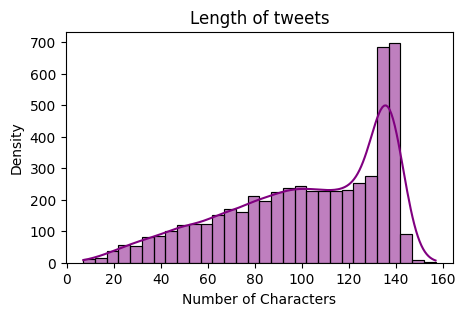

In [ ]:
#@title Plotting tweet length

plt.figure(figsize=(5,3))
sns.histplot(df_train["length"], kde=True,color='purple',bins=30)
plt.title("Length of tweets")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

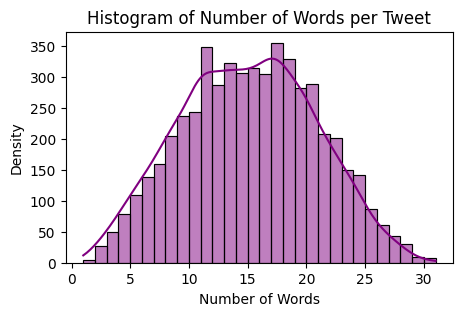

In [ ]:
# number of word in tweets
def count_words(x):
    return len(x.split())

df_train["num_words"] = df_train["text"].apply(count_words)

plt.figure(figsize=(5,3))
sns.histplot(df_train["num_words"],kde=True,color='purple',bins=30)
plt.title("Histogram of Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()



# Preprocessing


In [ ]:
#@title Text Preprocessing
string.punctuation # here I am taking all the punctuations in a string

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# clear the punctuations
def toclean_text(text):
    clean_text = [char for char in text if char not in string.punctuation]
    clean_text = ''.join(clean_text)
    return clean_text

In [ ]:
df_train['clean_text'] = df_train['text'].apply(toclean_text)
df_train.head(10)

,id,keyword,location,text,target,length,num_words,clean_text
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,138,19,Ashes 2015 AustraliaÛªs collapse at Trent Bri...
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,126,14,GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO b...
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,85,10,CNN Tennessee movie theater shooting suspect k...
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1,72,16,Still rioting in a couple of hours left until ...
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,134,22,Crack in the path where I wiped out this morni...
151,216,airplane%20accident,Somewhere Out There,Experts in France begin examining airplane deb...,1,136,18,Experts in France begin examining airplane deb...
915,1324,bloody,Isolated City In World Perth,'I came to kill Indians...for FUN': Video of s...,1,129,17,I came to kill Indiansfor FUN Video of smirkin...
1305,1886,burning,NaN,@JohnsonTionne except idk them?? it's really b...,0,59,8,JohnsonTionne except idk them its really burning
2570,3685,destroy,he/him or she/her (ask),destroy the house,0,17,3,destroy the house
7399,10587,wounded,"Maracay y Nirgua, Venezuela",Police Officer Wounded Suspect Dead After Exch...,1,81,9,Police Officer Wounded Suspect Dead After Exch...


In [ ]:
#@title Removing Noise

In [ ]:
#@title Abbreviations

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
#@title Functions
#Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

In [ ]:
# function clean tweet will send to the upper snippet and clean the noises
def clean_tweet(text):

    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)

    # replace abbreviations, @ and number
    text = replace_abbrev(text)
    text = remove_mention(text)
    text = remove_number(text)

    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)

    return text

In [ ]:
df_train["clean_text"] = df_train["clean_text"].apply(clean_tweet)
df_train.head()

,id,keyword,location,text,target,length,num_words,clean_text
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,138,19,Ashes NUMBER Australias collapse at Trent Brid...
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,126,14,GREAT MICHIGAN TECHNIQUE CAMP BNUMBERG THANKS ...
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,85,10,CNN Tennessee movie theater shooting suspect k...
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1,72,16,Still rioting in a couple of hours left until ...
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,134,22,Crack in the path where I wiped out this morni...


In [ ]:
#@title Stopwords
nltk.download('stopwords') # download the stopwords corpus
from nltk.corpus import stopwords # import the stopwords corpus
print(stopwords.words('english'))
# print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# remove stepword
def toremove_stopword(text):
    remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return remove_stopword

In [ ]:
df_train['clean_text'] = df_train['clean_text'].apply(toremove_stopword)

In [ ]:
df_train.head()

,id,keyword,location,text,target,length,num_words,clean_text
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,138,19,"[Ashes, NUMBER, Australias, collapse, Trent, B..."
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,126,14,"[GREAT, MICHIGAN, TECHNIQUE, CAMP, BNUMBERG, T..."
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,85,10,"[CNN, Tennessee, movie, theater, shooting, sus..."
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1,72,16,"[Still, rioting, couple, hours, left, class]"
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,134,22,"[Crack, path, wiped, morning, beach, run, Surf..."


# Observe the Whole Datasegments

In [ ]:
df_train.head()

,id,keyword,location,text,target,length,num_words,clean_text
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,138,19,"[Ashes, NUMBER, Australias, collapse, Trent, B..."
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,126,14,"[GREAT, MICHIGAN, TECHNIQUE, CAMP, BNUMBERG, T..."
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,85,10,"[CNN, Tennessee, movie, theater, shooting, sus..."
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1,72,16,"[Still, rioting, couple, hours, left, class]"
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,134,22,"[Crack, path, wiped, morning, beach, run, Surf..."


In [ ]:
df_test.head()

,id,keyword,location,text,target
3014,4328,dust%20storm,"Pocatello, ID",Storm headed towards Idaho Falls with blowing ...,1
4774,6793,lightning,Reddit,Lightning strike in the distance via /r/pics h...,1
4306,6113,hellfire,NaN,Hellfire! We donÛªt even want to think about ...,0
420,609,arsonist,toronto,Bloor/Ossington arsonist also burned a mattres...,0
2398,3450,derail,"Dayton, OH",@realDonaldTrump @rushlimbaugh ITS PROOF democ...,0


In [ ]:
df_val.head()

,id,keyword,location,text,target
6334,9055,structural%20failure,NaN,@SirTitan45 Mega mood swing on a 24 hr schedu...,0
3892,5534,flattened,"Wahpeton, ND",Picking up flattened hay men (@ Masonite in Wa...,0
2662,3824,detonate,Worldwide,52.214904 5.139055 Nuke please. Target Hilvers...,1
5378,7675,panic,"Elsewhere, NZ",Lose bus card.\nPanic.\nKind bus driver.\nRepl...,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0


# Tokenizer

In [ ]:
#@title Tokenizer
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(df_train['clean_text'].values)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(df_train['clean_text'])# fix
val_sequences = tokenizer.texts_to_sequences(df_val['text'])
test_sequences = tokenizer.texts_to_sequences(df_test['text'])


train_padded = pad_sequences(train_sequences)
val_padded = pad_sequences(val_sequences)
test_padded = pad_sequences(test_sequences)

# Test data ta ke fit korabo na ; just text to sequence korbo
# evaluation data pura puri untouched
# train data tokenize korbo fit korbo

In [ ]:
train_padded.shape

(5329, 20)

In [ ]:
train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,  885,    1, 2010,
         93, 1050,  420, 1170,  713,  478, 1314,  763,    1], dtype=int32)

In [ ]:
#check which words are here the top
tokenizer.sequences_to_texts([[ 17, 1555,   20,  545,  963]])

['would details police declares series']

In [ ]:
test_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,   43, 2268, 1507,  426,
          4, 1236,   15, 1391,    4,   70, 1390], dtype=int32)

In [ ]:
tokenizer.sequences_to_texts([[759, 1184,  649, 1792, 1379]])

['declaration threat bigger seriously leaving']

In [ ]:
val_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       1754, 1810,  411,  261], dtype=int32)

In [ ]:
tokenizer.sequences_to_texts([[2487,  352,  528,   62]])

['vets possible anything years']

# MODEL

In [ ]:
import os

In [ ]:
# y = train_data['target']
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41)    #train test

In [ ]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [ ]:
#@title Bidirectional and Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional

In [ ]:
#@title glove online

In [ ]:
#glove
# !wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-10-02 18:56:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-02 18:56:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-02 18:56:07--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# !unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
 #@title Create embedding dictionary
embeddings_index = {}
# Add the full path to the file
# with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:   ## Offline
# with open('/content/glove.6B.100d.txt') as f:  # Changed this line
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
embedding_matrix = np.zeros((max_features, 100))
for word, index in tokenizer.word_index.items():
    if index > max_features - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
# Extract labels from the dataset
Y_train = df_train['target'].values
Y_val = df_val['target'].values
Y_test = df_test['target'].values


In [ ]:
Y_train


array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
#model
lstm_out = 64
# Modify the model
model = Sequential()
# max_features: The size of the vocabulary.
# 100: The dimensionality of each embedding vector, matching the GloVe embeddings.
# embedding matrix of glove
# Sets the length of input sequences based on the padded training data.
model.add(Embedding(max_features, 100, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_length=train_padded.shape[1], trainable=False))
model.add(Dropout(0.2))
#Introduces regularization by randomly setting 20% of the input units to zero during training, mitigating overfitting.
#dropout to the recurrent connections, enhancing the model's ability to generalize by preventing over-reliance on specific neurons.
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4)))
#A single neuron with a sigmoid activation function
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.00001) # 1 * 10 ^-5
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['recall', 'accuracy', 'precision'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# history = model.fit(X, Y, epochs = 30, batch_size=45, validation_data= df_val, callbacks=[early_stopping])
# print(model.summary())

In [ ]:
# Train the model
history = model.fit(
    train_padded,          # Input data for training
    Y_train,               # Labels for training
    epochs=30,             # Maximum number of epochs
    batch_size=45,         # Number of samples per gradient update
    validation_data=(val_padded, Y_val),  # Validation data
    callbacks=[early_stopping],           # Early stopping callback
    verbose=1                              # Verbosity mode
)


Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.5424 - loss: 0.6878 - precision: 0.4723 - recall: 0.5624 - val_accuracy: 0.5504 - val_loss: 0.6866 - val_precision: 0.4813 - val_recall: 0.3112
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5834 - loss: 0.6812 - precision: 0.5215 - recall: 0.5146 - val_accuracy: 0.5889 - val_loss: 0.6784 - val_precision: 0.5621 - val_recall: 0.2870
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6123 - loss: 0.6731 - precision: 0.5590 - recall: 0.4399 - val_accuracy: 0.6180 - val_loss: 0.6705 - val_precision: 0.6617 - val_recall: 0.2659
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6338 - loss: 0.6665 - precision: 0.5950 - recall: 0.4424 - val_accuracy: 0.6353 - val_loss: 0.6627 - val_precision: 0.7000 - val_recall: 0.2961
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6385 - loss: 0.6620 - precision: 0.6162 - recall: 0.4182 - val_accuracy: 0.6499 - val_l

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 100)             │         300,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,829 (2.11 MB)

 Trainable params: 84,609 (330.50 KB)

 Non-trainable params: 300,000 (1.14 MB)

 Optimizer params: 169,220 (661.02 KB)

None


In [ ]:
# y_pred = model.predict(test_padded).round()

In [ ]:
# y_pred

# Model Train vs Validation

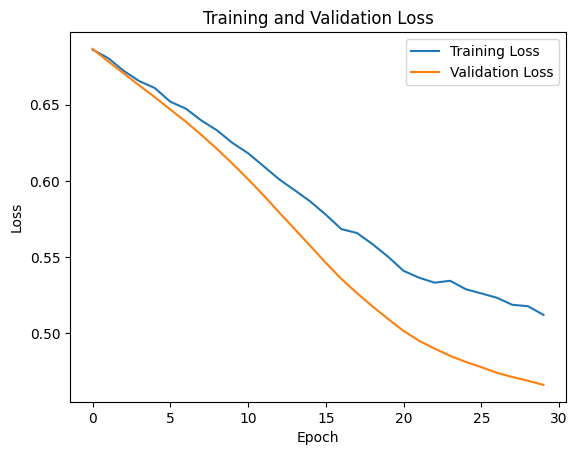

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

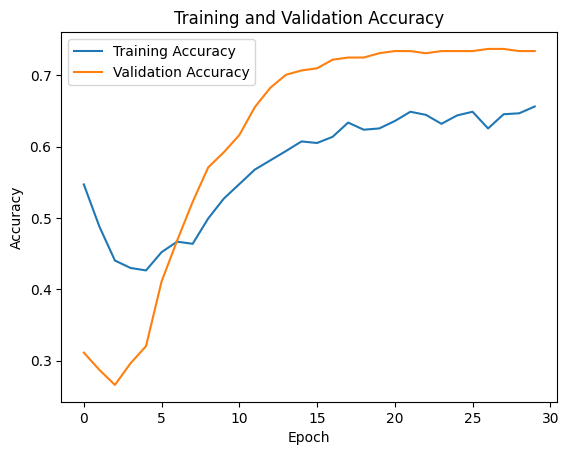

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['recall'], label='Training Accuracy')
plt.plot(history.history['val_recall'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing

In [ ]:
y_pred = model.predict(test_padded)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Test F1-Score:", model.evaluate(test_padded, Y_test)[1])

print(classification_report(Y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7623 - loss: 0.5172 - precision: 0.7682 - recall: 0.6419
Test F1-Score: 0.6677165627479553
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       895
           1       0.77      0.67      0.72       635

    accuracy                           0.78      1530
   macro avg       0.78      0.76      0.77      1530
weighted avg       0.78      0.78      0.78      1530

